In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from scipy.stats import zscore

In [8]:
# import os
# print(os.listdir(r"C:\Users\HP\OneDrive - Manipal Academy of Higher Education\Desktop\Certifications\Data science and python"))

## Exploratory Data Analysis

In [9]:
df = pd.read_csv(r"work-order-management-module.csv")
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206058 entries, 0 to 206057
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   svc_request_number              206058 non-null  int64 
 1   workorder_number                206058 non-null  int64 
 2   workorder_activity_code         206045 non-null  object
 3   workorder_activity_description  206045 non-null  object
 4   workorder_started               176702 non-null  object
 5   workorder_completed             179272 non-null  object
 6   workorder_added                 206058 non-null  object
 7   time_stamp                      206058 non-null  object
dtypes: int64(2), object(6)
memory usage: 12.6+ MB


In [10]:
df.head()

,svc_request_number,workorder_number,workorder_activity_code,workorder_activity_description,workorder_started,workorder_completed,workorder_added,time_stamp
0,860449,895401,SA25,REPAIR CONNECTION,NaN,NaN,2004-07-16T10:00:04.000,2015-07-07T00:45:01.000
1,168089,100322,SA27,PERFORM OTHER MANHOLE WORK,NaN,NaN,2000-06-01T13:20:07.000,2015-06-29T00:40:55.000
2,428803,843089280,WA10,RESET/REPLACE VALVE BOX,2015-06-10T08:20:00.000,2015-06-10T11:00:00.000,2002-04-08T23:03:19.000,2015-06-16T00:45:01.000
3,185634611,842762063,SA26,REPLACE MANHOLE CASTING,2016-02-25T00:45:00.000,2016-02-25T03:00:00.000,2013-09-03T09:13:14.000,2016-02-26T00:45:03.000
4,895478,842882322,SRL,LINE SEWER (CONTRACTOR),2016-11-29T00:00:00.000,2016-12-13T00:00:00.000,2014-04-23T13:47:23.000,2017-01-10T00:45:01.000


In [ ]:
df.shape

(206058, 8)

#### Data Cleaning

In [11]:
#Check total number of Nan's
print(df.isna().sum())

svc_request_number                    0
workorder_number                      0
workorder_activity_code              13
workorder_activity_description       13
workorder_started                 29356
workorder_completed               26786
workorder_added                       0
time_stamp                            0
dtype: int64


In [13]:
# Remove rows with missing values in workorder_activity_code since it contains Client information which can be filled with assumptions
cleaning_df = df.dropna(subset=['workorder_activity_code'])

In [14]:
print(cleaning_df.isna().sum())

svc_request_number                    0
workorder_number                      0
workorder_activity_code               0
workorder_activity_description        0
workorder_started                 29351
workorder_completed               26781
workorder_added                       0
time_stamp                            0
dtype: int64


In [ ]:
print(cleaning_df.shape)

(206045, 8)


In [ ]:
# Check for duplicate enteries
has_duplicates = cleaning_df.duplicated().any()

print("Does the DataFrame have duplicate rows?", has_duplicates)

Does the DataFrame have duplicate rows? True


In [15]:
# Remove duplicates rows
cleaning_df = cleaning_df.drop_duplicates()

In [16]:
print(cleaning_df.isna().sum())

svc_request_number                    0
workorder_number                      0
workorder_activity_code               0
workorder_activity_description        0
workorder_started                 27589
workorder_completed               25024
workorder_added                       0
time_stamp                            0
dtype: int64


In [17]:
print(cleaning_df.shape)

(196336, 8)


In [18]:
#### Fearure Engineer ( New feature was engineered from the workorder_started and workorder_completed columns to extract additional information. )

In [19]:
cleaning_df['workorder_started'] = pd.to_datetime(cleaning_df['workorder_started'], errors='coerce')
cleaning_df['workorder_completed'] = pd.to_datetime(cleaning_df['workorder_completed'], errors='coerce')
cleaning_df['workorder_added'] = pd.to_datetime(cleaning_df['workorder_added'], errors='coerce')

In [20]:

# Calculate the difference in seconds between workorder_started and workorder_completed to understand the relationship between columns
# We consider the smallest unit seconds instead of any other unit
cleaning_df['sec_btw_startAndadd'] = (cleaning_df['workorder_added'] - cleaning_df['workorder_started']).dt.total_seconds()

In [21]:
cleaning_df['dateTime_btw_startAndadd'] = pd.to_timedelta(cleaning_df['sec_btw_startAndadd'], unit='s')
cleaning_df['sec_btw_startAndadd'].describe()

,sec_btw_startAndadd
count,1.687460e+05
mean,-1.984315e+06
std,9.097527e+07
min,-6.445651e+08
25%,-3.776612e+05
50%,5.125600e+04
75%,1.763895e+05
max,8.331298e+09


In [22]:
# Check the rows with negative total seconds
cleaning_df[cleaning_df['sec_btw_startAndadd'] < 0]

,svc_request_number,workorder_number,workorder_activity_code,workorder_activity_description,workorder_started,workorder_completed,workorder_added,time_stamp,sec_btw_startAndadd,dateTime_btw_startAndadd
2,428803,843089280,WA10,RESET/REPLACE VALVE BOX,2015-06-10 08:20:00,2015-06-10 11:00:00,2002-04-08 23:03:19,2015-06-16T00:45:01.000,-415617401.0,-4811 days +14:43:19
3,185634611,842762063,SA26,REPLACE MANHOLE CASTING,2016-02-25 00:45:00,2016-02-25 03:00:00,2013-09-03 09:13:14,2016-02-26T00:45:03.000,-78161506.0,-905 days +08:28:14
4,895478,842882322,SRL,LINE SEWER (CONTRACTOR),2016-11-29 00:00:00,2016-12-13 00:00:00,2014-04-23 13:47:23,2017-01-10T00:45:01.000,-82116757.0,-951 days +13:47:23
5,2011048,1780489,WHF,FLUSH HYDRANTS IN AREA,2016-02-17 17:41:00,2016-02-17 17:41:00,2008-12-02 13:48:23,2016-02-18T00:45:01.000,-227505157.0,-2634 days +20:07:23
7,185645826,843047233,SRB,REPAIR SEWER BREAK (CONTRACT.),2015-11-14 07:00:00,2015-11-17 15:00:00,2015-04-03 08:15:43,2015-11-24T00:45:08.000,-19435457.0,-225 days +01:15:43
...,...,...,...,...,...,...,...,...,...,...
205946,186890432,844599074,WA04,REPAIR INOPERATIVE HYDRANT,2019-11-08 11:10:00,2019-11-08 11:55:00,2019-10-31 07:27:44,2019-11-13T00:50:01.000,-704536.0,-9 days +20:17:44
205947,186890434,844606029,WA06J,REPAIR JOINT LEAK,2019-11-20 08:00:00,2019-11-20 14:00:00,2019-11-19 13:25:01,2019-11-28T00:50:01.000,-66899.0,-1 days +05:25:01
205951,186890485,844599073,WL3D,ISSUE 3-DAY NOTICE,2019-11-07 19:50:00,2019-11-07 20:00:00,2019-10-31 07:18:34,2019-11-20T00:50:01.000,-649886.0,-8 days +11:28:34
205958,186880987,844592533,SMPC,POLE CAMERA,2019-11-03 08:30:00,2019-11-03 09:00:00,2019-10-16 10:46:37,2019-11-06T00:50:02.000,-1547003.0,-18 days +02:16:37


In [23]:
# Non Negative data proving our assumption that workerorder_added is a final update on the activity
cleaning_df[cleaning_df['sec_btw_startAndadd'] > 0]

,svc_request_number,workorder_number,workorder_activity_code,workorder_activity_description,workorder_started,workorder_completed,workorder_added,time_stamp,sec_btw_startAndadd,dateTime_btw_startAndadd
6,185673001,843073274,SVAC,VACTOR SEWER,2015-05-05 10:45:00,2015-05-05 11:45:00,2015-05-07 10:25:54,2015-05-08T00:45:09.000,171654.0,1 days 23:40:54
9,185537818,843454743,SCC,CLEAN CATCH BASIN/INLET,2016-06-30 11:40:00,2016-06-30 12:45:00,2016-08-01 20:54:30,2016-08-02T00:45:02.000,2798070.0,32 days 09:14:30
12,2044719,1797043,SMDT,PERFORM DYE TEST,2008-12-27 19:45:00,2018-12-27 21:25:00,2008-12-27 23:03:12,2016-02-18T00:45:01.000,11892.0,0 days 03:18:12
56,185529045,843454734,SCC,CLEAN CATCH BASIN/INLET,2016-06-30 08:30:00,2016-06-30 11:30:00,2016-08-01 20:16:49,2016-08-02T00:45:02.000,2807209.0,32 days 11:46:49
62,185535341,843454705,SCC,CLEAN CATCH BASIN/INLET,2016-07-01 09:25:00,2016-07-01 10:50:00,2016-08-01 18:24:28,2016-08-02T00:45:02.000,2710768.0,31 days 08:59:28
...,...,...,...,...,...,...,...,...,...,...
205996,186890222,844600355,SCC,CLEAN CATCH BASIN/INLET,2019-11-01 09:55:00,2019-11-01 10:20:00,2019-11-04 12:26:52,2019-11-05T00:50:01.000,268312.0,3 days 02:31:52
205998,186890414,844600232,SSFC,FLUSH PAST HOUSE CONNECTION,2019-11-01 02:40:00,2019-11-01 05:10:00,2019-11-04 10:56:01,2019-11-05T00:50:01.000,288961.0,3 days 08:16:01
206038,186902726,844609658,WHSNC,SHUT RUNNING HYD.NON-CUSTODIAN,2019-11-27 02:05:00,2019-11-27 02:10:00,2019-11-27 10:19:27,2019-11-28T00:50:01.000,29667.0,0 days 08:14:27
206040,186902769,844609597,WL3D,ISSUE 3-DAY NOTICE,2019-11-26 21:15:00,NaT,2019-11-27 06:21:08,2019-11-28T00:50:01.000,32768.0,0 days 09:06:08


In [24]:
# Remove noisy data with negative seconds from dataframe
cleaning_df = cleaning_df[cleaning_df['sec_btw_startAndadd'] > 0].reset_index(drop=True)

In [25]:
cleaning_df.shape

(107577, 10)

In [26]:
# Calculate the difference in seconds between workorder_started and workorder_completed to understand the relationship between columns
# We consider the smallest unit seconds instead of any other unit
cleaning_df['time_taken_activity'] = pd.to_timedelta(cleaning_df['workorder_completed'] - cleaning_df['workorder_started'])

In [27]:
print(cleaning_df.isna().sum())

svc_request_number                  0
workorder_number                    0
workorder_activity_code             0
workorder_activity_description      0
workorder_started                   0
workorder_completed               454
workorder_added                     0
time_stamp                          0
sec_btw_startAndadd                 0
dateTime_btw_startAndadd            0
time_taken_activity               454
dtype: int64


In [28]:
cleaning_df['time_taken_activity'].describe([.05,.10,.20,.50,.75,.90,.99])

,time_taken_activity
count,107123
mean,23 days 06:11:37.006058456
std,1299 days 12:48:06.139769648
min,-35 days +00:10:00
5%,0 days 00:14:00
10%,0 days 00:15:00
20%,0 days 00:20:00
50%,0 days 00:35:00
75%,0 days 01:10:00
90%,0 days 08:19:00


In [29]:
# As per above stats we should have wordorder_complete less than workorder_start
cleaning_df[cleaning_df['workorder_completed'] < cleaning_df['workorder_started']]

,svc_request_number,workorder_number,workorder_activity_code,workorder_activity_description,workorder_started,workorder_completed,workorder_added,time_stamp,sec_btw_startAndadd,dateTime_btw_startAndadd,time_taken_activity
803,185936012,843080729,SA12F,APPLY COLD PATCH,2015-05-21 00:45:00,2015-05-20 02:45:00,2015-05-21 15:10:14,2015-05-22T00:45:09.000,51914.0,0 days 14:25:14,-1 days +02:00:00
1058,185934585,843077275,WVC,CLOSE VALVE,2015-05-17 08:15:00,2015-05-17 03:40:00,2015-05-18 08:03:12,2015-05-29T00:45:03.000,85692.0,0 days 23:48:12,-1 days +19:25:00
1099,185934880,843078473,SSF,FLUSH SEWER SECTION,2015-05-17 23:35:00,2015-05-17 12:20:00,2015-05-18 13:58:50,2015-05-19T00:45:07.000,51830.0,0 days 14:23:50,-1 days +12:45:00
1250,185946435,843087149,SCC,CLEAN CATCH BASIN/INLET,2015-06-07 12:15:00,2015-06-06 12:45:00,2015-06-08 09:22:59,2015-06-09T00:45:09.000,76079.0,0 days 21:07:59,-1 days +00:30:00
1304,185950134,843103220,SMPC,POLE CAMERA,2015-06-26 08:30:00,2015-06-23 10:15:00,2015-07-02 13:26:54,2015-07-03T00:45:09.000,536214.0,6 days 04:56:54,-3 days +01:45:00
...,...,...,...,...,...,...,...,...,...,...,...
98517,186795801,844356262,SCC,CLEAN CATCH BASIN/INLET,2019-06-04 09:10:00,2019-06-04 08:30:00,2019-06-05 11:30:32,2019-06-06T00:50:02.000,94832.0,1 days 02:20:32,-1 days +23:20:00
98880,186770971,844321394,SSFC,FLUSH PAST HOUSE CONNECTION,2019-04-16 19:35:00,2019-04-16 17:10:00,2019-04-17 10:17:16,2019-04-18T00:50:01.000,52936.0,0 days 14:42:16,-1 days +21:35:00
99284,186778718,844360622,SVAC,VACTOR SEWER,2019-05-30 23:40:00,2019-05-30 03:00:00,2019-06-12 10:22:55,2019-06-13T00:50:01.000,1075375.0,12 days 10:42:55,-1 days +03:20:00
99285,186778718,844360619,SVAC,VACTOR SEWER,2019-05-25 23:40:00,2019-05-25 03:50:00,2019-06-12 10:22:55,2019-06-13T00:50:01.000,1507375.0,17 days 10:42:55,-1 days +04:10:00


In [30]:
cleaning_df = cleaning_df.drop(index=cleaning_df[cleaning_df['workorder_completed'] <= cleaning_df['workorder_started']].index).reset_index(drop=True)

In [31]:
cleaning_df.shape

(107153, 11)

In [32]:
cleaning_df['time_taken_activity'].describe([.05,.10,.20,.50,.75,.90,.99])

,time_taken_activity
count,106699
mean,23 days 08:40:52.779126327
std,1302 days 02:40:59.582852448
min,0 days 00:01:00
5%,0 days 00:15:00
10%,0 days 00:15:00
20%,0 days 00:20:00
50%,0 days 00:35:00
75%,0 days 01:10:00
90%,0 days 08:30:00


In [33]:
print(cleaning_df.isna().sum())

svc_request_number                  0
workorder_number                    0
workorder_activity_code             0
workorder_activity_description      0
workorder_started                   0
workorder_completed               454
workorder_added                     0
time_stamp                          0
sec_btw_startAndadd                 0
dateTime_btw_startAndadd            0
time_taken_activity               454
dtype: int64


##### Remove Outliers using Percentiles

In [34]:
# Convert timedelta to total seconds as float for calculation
cleaning_df['time_taken_activity_seconds'] = cleaning_df['time_taken_activity'].dt.total_seconds()

lower_bound = cleaning_df['time_taken_activity_seconds'].quantile(0.1)
upper_bound = cleaning_df['time_taken_activity_seconds'].quantile(0.99)

In [ ]:
cleaning_df = cleaning_df[(cleaning_df['time_taken_activity_seconds'] >= lower_bound) & (cleaning_df['time_taken_activity_seconds'] <= upper_bound)  | cleaning_df['time_taken_activity_seconds'].isna()].reset_index(drop=True)

In [35]:
cleaning_df.shape

(107153, 12)

In [36]:
cleaning_df['time_taken_activity'].describe([.05,.10,.20,.50,.75,.90,.99])

,time_taken_activity
count,106699
mean,23 days 08:40:52.779126327
std,1302 days 02:40:59.582852448
min,0 days 00:01:00
5%,0 days 00:15:00
10%,0 days 00:15:00
20%,0 days 00:20:00
50%,0 days 00:35:00
75%,0 days 01:10:00
90%,0 days 08:30:00


In [37]:
print(cleaning_df.isna().sum())

svc_request_number                  0
workorder_number                    0
workorder_activity_code             0
workorder_activity_description      0
workorder_started                   0
workorder_completed               454
workorder_added                     0
time_stamp                          0
sec_btw_startAndadd                 0
dateTime_btw_startAndadd            0
time_taken_activity               454
time_taken_activity_seconds       454
dtype: int64


In [38]:
cleaning_df['time_taken_activity'] = cleaning_df['time_taken_activity'].fillna(cleaning_df.groupby('workorder_activity_description')['time_taken_activity'].transform('mean'))
cleaning_df['time_taken_activity_seconds'] = cleaning_df['time_taken_activity_seconds'].fillna(cleaning_df.groupby('workorder_activity_description')['time_taken_activity_seconds'].transform('mean'))

In [39]:
print(cleaning_df.isna().sum())

svc_request_number                  0
workorder_number                    0
workorder_activity_code             0
workorder_activity_description      0
workorder_started                   0
workorder_completed               454
workorder_added                     0
time_stamp                          0
sec_btw_startAndadd                 0
dateTime_btw_startAndadd            0
time_taken_activity                 6
time_taken_activity_seconds         6
dtype: int64


In [40]:
cleaning_df[cleaning_df['time_taken_activity'].isna()]

,svc_request_number,workorder_number,workorder_activity_code,workorder_activity_description,workorder_started,workorder_completed,workorder_added,time_stamp,sec_btw_startAndadd,dateTime_btw_startAndadd,time_taken_activity,time_taken_activity_seconds
25944,186111906,843244858,DOHS,HEALTH DEPT. INVESTIGATION SWR,2016-03-10 00:00:00,NaT,2016-03-28 10:18:11,2016-03-31T00:45:02.000,1592291.0,18 days 10:18:11,NaT,NaN
31408,186109311,843244165,DOHS,HEALTH DEPT. INVESTIGATION SWR,2016-03-10 00:00:00,NaT,2016-03-25 13:07:56,2016-03-31T00:45:02.000,1343276.0,15 days 13:07:56,NaT,NaN
58293,186388365,843667341,DOHQ,HEALTH DEPT.INVESTIGATION DWQC,2017-07-11 10:04:00,NaT,2017-07-11 10:04:26,2017-07-12T00:45:02.000,26.0,0 days 00:00:26,NaT,NaN
63212,186415845,843834858,DOHQ,HEALTH DEPT.INVESTIGATION DWQC,2017-08-28 13:25:00,NaT,2017-08-28 13:25:11,2017-08-29T00:45:03.000,11.0,0 days 00:00:11,NaT,NaN
65407,186427188,843845902,DOHQ,HEALTH DEPT.INVESTIGATION DWQC,2017-09-19 17:05:00,NaT,2017-09-19 17:05:27,2017-09-20T00:45:02.000,27.0,0 days 00:00:27,NaT,NaN
75154,186427616,843845907,DOHQ,HEALTH DEPT.INVESTIGATION DWQC,2017-09-19 17:12:00,NaT,2017-09-19 17:12:20,2017-09-20T00:45:02.000,20.0,0 days 00:00:20,NaT,NaN


In [ ]:
cleaning_df = cleaning_df.dropna(subset=['time_taken_activity'])

In [ ]:
print(cleaning_df.isna().sum())

svc_request_number                  0
workorder_number                    0
workorder_activity_code             0
workorder_activity_description      0
workorder_started                   0
workorder_completed               448
workorder_added                     0
time_stamp                          0
sec_btw_startAndadd                 0
dateTime_btw_startAndadd            0
time_taken_activity                 0
time_taken_activity_seconds         0
dtype: int64


In [41]:
new_df = cleaning_df.reset_index(drop=True)

In [42]:
new_df['time_taken_activity'].describe()

,time_taken_activity
count,107147
mean,24 days 00:18:26.814433500
std,1299 days 15:49:31.599774816
min,0 days 00:01:00
25%,0 days 00:25:00
50%,0 days 00:35:00
75%,0 days 01:10:00
max,96574 days 07:37:00


In [43]:
new_df.shape

(107153, 12)

In [44]:
print(new_df.isna().sum())

svc_request_number                  0
workorder_number                    0
workorder_activity_code             0
workorder_activity_description      0
workorder_started                   0
workorder_completed               454
workorder_added                     0
time_stamp                          0
sec_btw_startAndadd                 0
dateTime_btw_startAndadd            0
time_taken_activity                 6
time_taken_activity_seconds         6
dtype: int64


In [45]:
print("Percentage of data cleaned from orginal is : ", (new_df.shape[0]/df.shape[0])*100, "%")

Percentage of data cleaned from orginal is :  52.00137825272496 %


In [46]:
# Extract year, month, date, and time into separate columns
new_df['ws_year'] = new_df['workorder_started'].dt.year
new_df['ws_month'] = new_df['workorder_started'].dt.month
new_df['ws_date'] = new_df['workorder_started'].dt.day
new_df['ws_time'] = new_df['workorder_started'].dt.time

new_df['wc_year'] = new_df['workorder_completed'].dt.year
new_df['wc_month'] = new_df['workorder_completed'].dt.month
new_df['wc_date'] = new_df['workorder_completed'].dt.day
new_df['wc_time'] = new_df['workorder_completed'].dt.time

new_df['wa_year'] = new_df['workorder_added'].dt.year
new_df['wa_month'] = new_df['workorder_added'].dt.month
new_df['wa_date'] = new_df['workorder_added'].dt.day
new_df['wa_time'] = new_df['workorder_added'].dt.time

In [47]:
new_df['ws_year'].value_counts().sort_index()

,count
ws_year,
1753,18
1760,1
1925,1
1947,1
1951,1
1995,1
2000,6
2001,6
2002,9


In [48]:
new_df['wc_year'].value_counts().sort_index()

,count
wc_year,
2015.0,18097
2016.0,27006
2017.0,22653
2018.0,19812
2019.0,19094
2020.0,8
2021.0,6
2022.0,12
2023.0,6


In [49]:
new_df['wa_year'].value_counts().sort_index()

,count
wa_year,
2001,1
2006,2
2008,1
2009,3
2011,1
2012,2
2013,2
2014,5
2015,17836


### Analysis

##### QUESTION 1 - What work orders are frequent

<ipython-input-610-d192e5057558>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


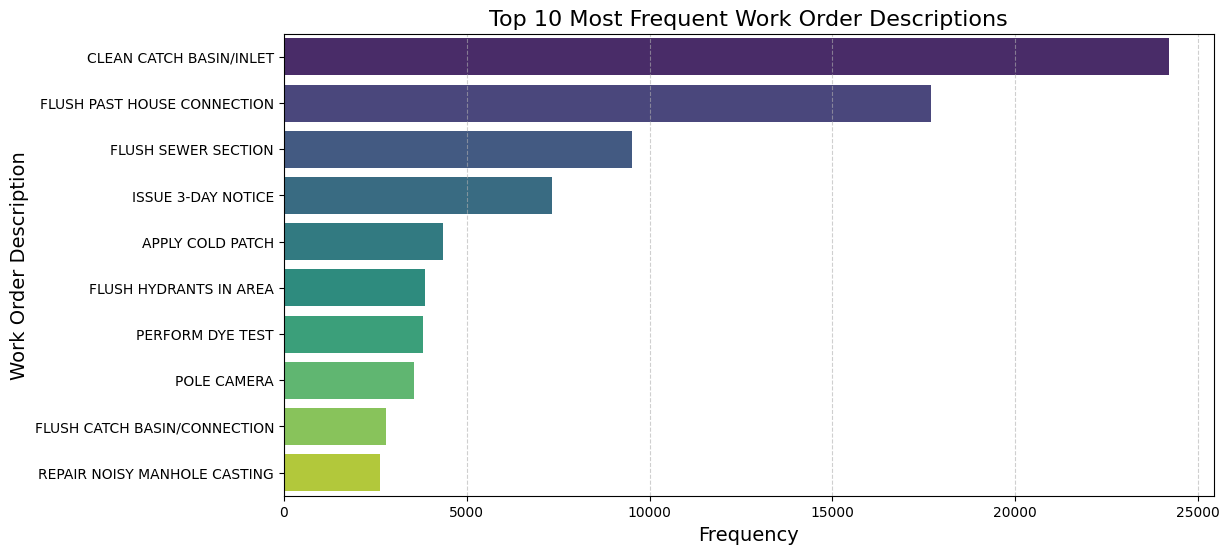

In [ ]:

# Get the top 10 most frequent work order descriptions
top_10_descriptions = new_df['workorder_activity_description'].value_counts().head(10).reset_index()
top_10_descriptions.columns = ['workorder_activity_description', 'Count']

# Plot the bar graph using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_descriptions,
    x='Count',
    y='workorder_activity_description',
    palette='viridis'
)
plt.title('Top 10 Most Frequent Work Order Descriptions', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Work Order Description', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()

##### QUESTION 2 -  What tasks are frequent for a particular client

In [ ]:
# Take top 5 recent Clients
new_df.sort_values(by="workorder_started",ascending=False).drop_duplicates(subset=['workorder_activity_code'])[['workorder_activity_code','workorder_started']].head(10).reset_index(drop=True)

,workorder_activity_code,workorder_started
0,WHF,2019-11-30 11:50:00
1,WVO,2019-11-30 11:30:00
2,WVC,2019-11-30 11:30:00
3,SSF,2019-11-29 21:55:00
4,SSFC,2019-11-29 18:55:00
5,WLDSC,2019-11-29 16:10:00
6,SMCR,2019-11-29 13:20:00
7,SMDT,2019-11-29 10:30:00
8,WA06J,2019-11-29 08:00:00
9,WL3D,2019-11-28 16:30:00


In [ ]:
# Get the list of Task frequent for client WHF
new_df[new_df['workorder_activity_code'] == 'WHF'][['workorder_activity_description']].value_counts()



,count
workorder_activity_description,
FLUSH HYDRANTS IN AREA,3867


##### QUESTION 3 - Which clients have similar types of issues

In [ ]:
# new_df.groupby('workorder_activity_description')['workorder_activity_code'].apply(lambda x: sorted(set(x), reverse=True) if len(set(x)) > 1 else list(set(x))).reset_index()
client_grouped = new_df.groupby('workorder_activity_description')['workorder_activity_code'].nunique().reset_index()

In [ ]:
client_grouped[client_grouped['workorder_activity_code'] > 1]

,workorder_activity_description,workorder_activity_code
0,APPLY COLD PATCH,2
6,CAVE IN RESTORATION,2


In [ ]:
print("For Issue 'APPLY COLD PATCH' below are common client ")
for client in new_df[new_df['workorder_activity_description']=='APPLY COLD PATCH']['workorder_activity_code'].unique():
  print("   ",client)

For Issue 'APPLY COLD PATCH' below are common client 
    SA12F
    WA12F


In [ ]:
print("For Issue 'CAVE IN RESTORATION' below are common client ")
for client in new_df[new_df['workorder_activity_description']=='CAVE IN RESTORATION']['workorder_activity_code'].unique():
  print("   ",client)

For Issue 'CAVE IN RESTORATION' below are common client 
    SA12R
    WA12R


##### QUESTION 4 - How much time is required for each task on average?

In [ ]:

avg_seconds = new_df.groupby('workorder_activity_description')['time_taken_activity_seconds'].mean().reset_index()

# Convert the average seconds back to timedelta
avg_seconds['avg_time_taken_activity'] = pd.to_timedelta(avg_seconds['time_taken_activity_seconds'], unit='s')

In [ ]:
avg_seconds[['workorder_activity_description', 'avg_time_taken_activity']]

,workorder_activity_description,avg_time_taken_activity
0,APPLY COLD PATCH,0 days 00:59:34.848066298
1,APPLY HOT PATCH,0 days 02:12:47.037861915
2,ASBESTOS SAMPLING AND TESTING,11 days 17:21:40
3,ASBESTOS/ABATEMENT EXCAVATION,12 days 09:26:00
4,CARPENTRY,6 days 11:34:28.800000
...,...,...
110,TV SEWER (USE COMMENTS),0 days 01:55:00
111,VACANT BUILD- SHUT TAP/WET CON,0 days 16:05:53.217391304
112,VACTOR SEWER,0 days 06:46:00.662068966
113,WALK SEWER,0 days 01:00:00


##### QUESTION 5 - Which is the task that takes more time and avg time?

In [ ]:
from IPython.display import display, Markdown

# Find the maximum time taken
max_time = new_df['time_taken_activity'].max()

# Find the task with this maximum time
max_time_task = new_df[new_df['time_taken_activity'] == max_time]['workorder_activity_description'].iloc[0]

# Find the average time taken for this task
avg_time_for_max_task = new_df[new_df['workorder_activity_description'] == max_time_task]['time_taken_activity'].mean()

# Print the results with Markdown formatting for bold text
display(Markdown(f"**Task with Maximum Time:** {max_time_task}"))
display(Markdown(f"**Maximum Time Taken:** {max_time}"))
display(Markdown(f"**Average Time for this Task:** {avg_time_for_max_task}"))

**Task with Maximum Time:** RESET CURB PIECE

**Maximum Time Taken:** 21 days 02:35:00

**Average Time for this Task:** 0 days 01:56:37.223974763

In [ ]:
new_df['time_taken_activity'].describe([.25,.50,.75,.90,.99])

,time_taken_activity
count,101090
mean,0 days 17:39:13.237252277
std,2 days 12:35:59.557002118
min,0 days 00:15:00
25%,0 days 00:25:00
50%,0 days 00:40:00
75%,0 days 01:15:00
90%,0 days 08:00:00
99%,13 days 01:55:00
max,21 days 02:35:00


##### QUESTION 6 - What are the ranges of time per tasks?

In [ ]:
min_seconds = new_df.groupby('workorder_activity_description')['time_taken_activity_seconds'].min().reset_index()
max_seconds = new_df.groupby('workorder_activity_description')['time_taken_activity_seconds'].max().reset_index()

# Convert the average seconds back to timedelta
min_seconds['min_time_taken_activity'] = pd.to_timedelta(min_seconds['time_taken_activity_seconds'], unit='s')
max_seconds['max_time_taken_activity'] = pd.to_timedelta(max_seconds['time_taken_activity_seconds'], unit='s')

time_range = pd.merge(min_seconds, max_seconds, on='workorder_activity_description', how='inner')
time_range[['workorder_activity_description','min_time_taken_activity', 'max_time_taken_activity']]

,workorder_activity_description,min_time_taken_activity,max_time_taken_activity
0,APPLY COLD PATCH,0 days 00:15:00,20 days 00:25:00
1,APPLY HOT PATCH,0 days 00:15:00,20 days 00:35:00
2,ASBESTOS SAMPLING AND TESTING,11 days 09:14:00,12 days 09:32:00
3,ASBESTOS/ABATEMENT EXCAVATION,12 days 09:26:00,12 days 09:26:00
4,CARPENTRY,0 days 21:36:00,20 days 00:01:00
...,...,...,...
110,TV SEWER (USE COMMENTS),0 days 01:55:00,0 days 01:55:00
111,VACANT BUILD- SHUT TAP/WET CON,0 days 00:30:00,16 days 00:00:00
112,VACTOR SEWER,0 days 00:15:00,12 days 20:30:00
113,WALK SEWER,0 days 01:00:00,0 days 01:00:00


In [ ]:
new_df.columns

Index(['svc_request_number', 'workorder_number', 'workorder_activity_code',
       'workorder_activity_description', 'workorder_started',
       'workorder_completed', 'workorder_added', 'time_stamp',
       'sec_btw_startAndadd', 'dateTime_btw_startAndadd',
       'time_taken_activity', 'time_taken_activity_seconds', 'ws_year',
       'ws_month', 'ws_date', 'ws_time', 'wc_year', 'wc_month', 'wc_date',
       'wc_time', 'wa_year', 'wa_month', 'wa_date', 'wa_time'],
      dtype='object')

## Additional Insights:

#### Maximum order received by Year , Month and Day (Ignored orders that occured only once in the year)

In [ ]:
new_df['ws_year'].unique()

array([2015, 2016, 2019, 2017, 2018, 2012, 2009], dtype=int32)

In [ ]:

most_work_year = new_df.groupby('ws_year')['workorder_activity_description'].count().reset_index(name='workorder_activity_count')

In [ ]:
most_work_year

,ws_year,workorder_activity_count
0,2009,1
1,2012,1
2,2015,17543
3,2016,26061
4,2017,21420
5,2018,18276
6,2019,17788


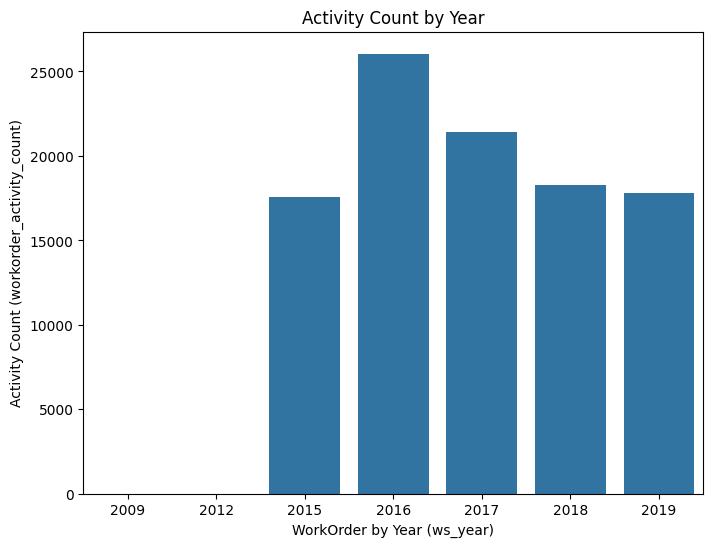

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='ws_year', y='workorder_activity_count', data=most_work_year)

# Set labels and title
plt.xlabel('WorkOrder by Year (ws_year)')
plt.ylabel('Activity Count (workorder_activity_count)')
plt.title('Activity Count by Year')

# Show the plot
plt.show()

In [ ]:

most_work_month = new_df.groupby('ws_month')['workorder_activity_description'].count().reset_index(name='workorder_activity_count')

In [ ]:
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
most_work_month['ws_month'] = most_work_month['ws_month'].replace(month_map)

In [ ]:
most_work_month

,ws_month,workorder_activity_count
0,Jan,7013
1,Feb,6286
2,Mar,6794
3,Apr,6407
4,May,8346
5,Jun,10852
6,Jul,11683
7,Aug,10739
8,Sep,9410
9,Oct,9067


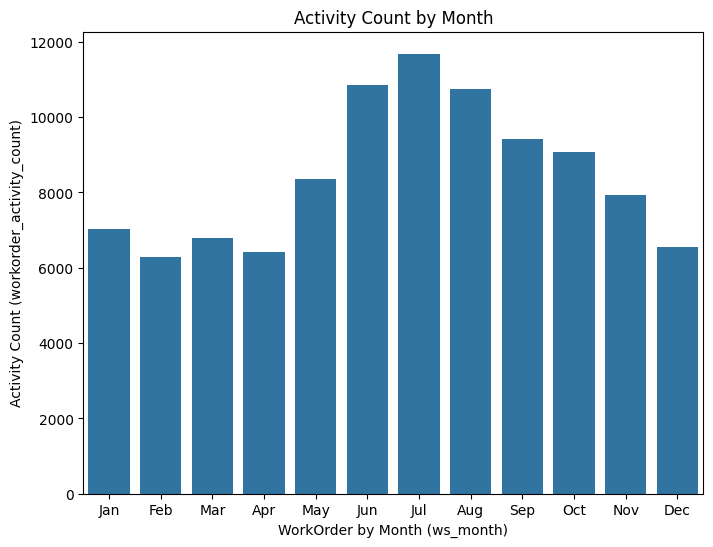

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='ws_month', y='workorder_activity_count', data=most_work_month)

# Set labels and title
plt.xlabel('WorkOrder by Month (ws_month)')
plt.ylabel('Activity Count (workorder_activity_count)')
plt.title('Activity Count by Month')

# Show the plot
plt.show()

In [ ]:
new_df['ws_date'] = new_df['workorder_started'].dt.day_name().str[:3]

In [ ]:

most_work_date = new_df.groupby('ws_date')['workorder_activity_description'].count().reset_index(name='workorder_activity_count')

In [ ]:
most_work_date

,ws_date,workorder_activity_count
0,Fri,14618
1,Mon,14451
2,Sat,10410
3,Sun,9521
4,Thu,16705
5,Tue,17222
6,Wed,18163


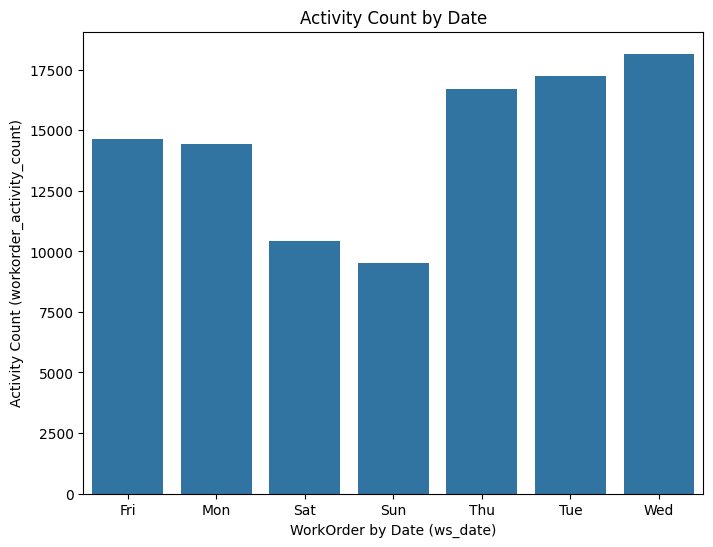

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='ws_date', y='workorder_activity_count', data=most_work_date)

# Set labels and title
plt.xlabel('WorkOrder by Date (ws_date)')
plt.ylabel('Activity Count (workorder_activity_count)')
plt.title('Activity Count by Date')

# Show the plot
plt.show()

#### Get the work order received in more years

In [ ]:
for wo in new_df['workorder_activity_description'].unique():
  num_years = len(new_df[new_df['workorder_activity_description']==wo]['ws_year'].unique())
  if num_years ==10:
    print("Work Order : ",wo)
    print("Number of years order received :" ,num_years)


In [ ]:
new_df[new_df['workorder_activity_description']=='ISSUE 3-DAY NOTICE'].groupby('workorder_activity_description')['ws_year'].value_counts().reset_index(name='frequency').sort_values(by="ws_year")

,workorder_activity_description,ws_year,frequency
4,ISSUE 3-DAY NOTICE,2015,859
2,ISSUE 3-DAY NOTICE,2016,1633
1,ISSUE 3-DAY NOTICE,2017,1783
0,ISSUE 3-DAY NOTICE,2018,1808
3,ISSUE 3-DAY NOTICE,2019,1246


In [ ]:
# Order declined in the year 2019 from 1907 to 1246